In [4]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset
import os
from PIL import Image
from tqdm import tqdm
from pycaret.classification import *

In [3]:
class SimpleDataset(Dataset):
    def __init__(self, addr,img_addr):
        self.file_name = sorted(os.listdir(addr))
        self.img_addr = img_addr
        self.addr = addr
    def __len__(self):
        return len(self.file_name)

    def __getitem__(self, idx):
        features = np.array(pd.read_csv(os.path.join(self.addr, self.file_name[idx],self.file_name[idx]+'.csv')).iloc[:,5:])
        img = os.path.join(self.img_addr, self.file_name[idx]+'.jpg')
        img = Image.open(img).convert('RGB')
        targ = self.file_name[idx].split('_')[-1]
        return features,img,targ


In [10]:
addr =    r"F:\Frames\extracted\Test"
img_addr = r"F:\Frames\new_dataset\Test_Frames\Test_Frames"
test = SimpleDataset(addr,img_addr)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


features shape  torch.Size([709])
image shape  torch.Size([3, 224, 224])
label  1


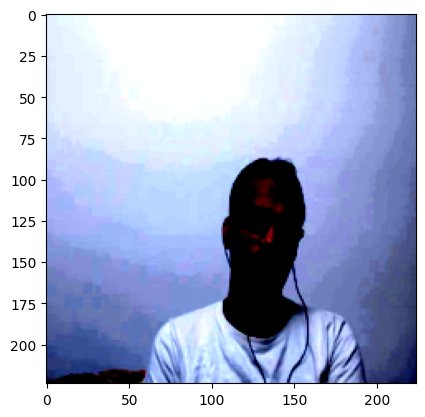

In [18]:

print("features shape ",test[0][0].shape)
print("image shape ",test[0][1].shape)
print("label ",test[0][2])
plt.imshow(test[1][1].permute(1,2,0))

In [11]:
test_x = []
test_y = []
for i,j,k in test:
    test_x.append(i[0])
    test_y.append(int(k))

In [12]:
df_test = pd.DataFrame(test_x)
df_test["target"] = pd.DataFrame(test_y)

In [13]:
mf = load_model(r"F:\RESTCN_CODE\best-model")

Transformation Pipeline and Model Successfully Loaded


In [8]:
mf

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['0', '1', '2', '3', '4', '5', '6',
                                             '7', '8', '9', '10', '11', '12',
                                             '13', '14', '15', '16', '17', '18',
                                             '19', '20', '21', '22', '23', '24',
                                             '25', '26', '27', '28', '29', ...],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('balance',
                 TransformerWrapper(transformer=FixImbalancer(estimator=SMOTE()))),
                ('normalize', TransformerWrapper(transformer=StandardScaler())),
                ('trained_model',
                 RandomForestClassifier(n_jobs=2, random_state=3090))])

In [14]:
pred_holdouts = predict_model(mf, data=df_test)


In [15]:
pred_holdouts


,0,1,2,3,4,5,6,7,8,9,...,702,703,704,705,706,707,708,target,prediction_label,prediction_score
0,-0.054417,0.041805,-0.997643,-0.153288,0.054274,-0.986690,-0.104,0.048,404.899994,409.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,3,0.53
1,0.097768,-0.067988,-0.992884,-0.092002,-0.117197,-0.988838,0.003,-0.093,358.000000,360.600006,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,3,0.47
2,0.043651,0.011214,-0.998984,-0.140496,0.005527,-0.990066,-0.049,0.008,298.100006,300.200012,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3,2,0.52
3,0.017367,-0.005394,-0.999835,-0.161335,-0.017823,-0.986739,-0.072,-0.012,298.299988,300.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2,0.48
4,0.000903,0.144131,-0.989558,-0.084279,0.080225,-0.993207,-0.042,0.113,292.600006,294.100006,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,2,0.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17835,0.121186,0.056988,-0.990993,-0.064035,0.091128,-0.993778,0.029,0.074,279.500000,280.899994,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3,0.46
17836,-0.082410,0.102016,-0.991363,-0.232173,0.062533,-0.970662,-0.159,0.084,403.100006,405.799988,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2,0.58
17837,0.098288,0.317184,-0.943257,-0.008128,0.307048,-0.951659,0.048,0.318,227.300003,228.699997,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3,2,0.66
17838,0.060880,0.111743,-0.991871,0.031166,0.106446,-0.993830,0.046,0.109,311.200012,313.100006,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3,0.61
